# ASTRO 533 - Mid Project 1

**Created:** Sep. 2020   
**Last Edit:** Sep. 2020  

**Author:** Bill Chen  
**Email:** ybchen@umich.edu  

## Load packages and read data

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from astropy.table import Table as tb
from astropy.coordinates import SkyCoord  # High-level coordinates
from astropy.coordinates import ICRS, Galactic, FK4, FK5  # Low-level frames
from astropy.coordinates import Angle, Latitude, Longitude  # Anglesfrom astropy.coordinates 
import astropy.units as u
import copy
plt.style.use('bill')

my_YlGnBu = copy.copy(mpl.cm.get_cmap('YlGnBu')) # copy the default cmap
my_YlGnBu.set_bad('w')
my_magma = copy.copy(mpl.cm.get_cmap('magma'))
my_magma.set_bad('k')

gaiarv_cat = tb.read('../glt13.fits', format='fits')
gaiarv_cat_m45 = tb.read('./glt21_m45.fits', format='fits')
# gaiarv_cat_m22 = tb.read('./glt19_m22.fits', format='fits')

## Pre-parameters

In [3]:
size_min = 0 * u.pc # in pc
size_max = 100 * u.pc # in pc

## Data processing

*There will be several useless warnings.* ***Ignore them!***

In [7]:
m45ra = 15 * (3 + (47/60) + (24/3600)) # RA = 3h 47m 24s
m45dec = 24 + (7/60) + (0/3600) # Dec = 24deg 7min 0sec

gaiarv_cat['d'] = 1000*u.pc*u.mas / (gaiarv_cat['parallax']) # distance in pc
gaiarv_cat['absmag'] = gaiarv_cat['phot_g_mean_mag'] - 5*np.log10(gaiarv_cat['d']/10) # absolute magnitude

gaiarv_cat_m45['d'] = 1000*u.pc*u.mas / (gaiarv_cat_m45['parallax']) # distance in pc
gaiarv_cat_m45['absmag'] = gaiarv_cat_m45['phot_g_mean_mag'] - 5*np.log10(gaiarv_cat_m45['d']/10) # absolute magnitude

# indices of neighborhood stars
ind_nb_pre, = np.where((gaiarv_cat['d'] < size_max) & (gaiarv_cat['d'] > size_min)) # only for plotting
ind_nb, = np.where((gaiarv_cat['d'] < size_max) & (gaiarv_cat['d'] > size_min) &
                   (gaiarv_cat['absmag'] < 4*gaiarv_cat['bp_rp']+2) &
                   (((gaiarv_cat['absmag'] > 15*gaiarv_cat['bp_rp']-10.5) & (gaiarv_cat['bp_rp'] < 1)) |
                   ((gaiarv_cat['absmag'] > 2.25*gaiarv_cat['bp_rp']+2.25) & (gaiarv_cat['bp_rp'] > 1))))
print('# of pre-filter neighborhood stars:', len(ind_nb_pre))
print('# of neighborhood stars:', len(ind_nb))

# indices of m45 stars
ind_m45, = np.where((abs(gaiarv_cat_m45['ra']-m45ra) < 3) & (abs(gaiarv_cat_m45['dec']-m45dec) < 3) &
                    (abs(gaiarv_cat_m45['pmra']-20) < 5) & (abs(gaiarv_cat_m45['pmdec']+45) < 5) &
                    (abs(gaiarv_cat_m45['parallax']-7.3) < 0.7))
print('# of m45 stars:', len(ind_m45))

c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """
c:\users\bill\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log10
  


# of pre-filter neighborhood stars: 80008
# of neighborhood stars: 75529
# of m45 stars: 1033


## CMD

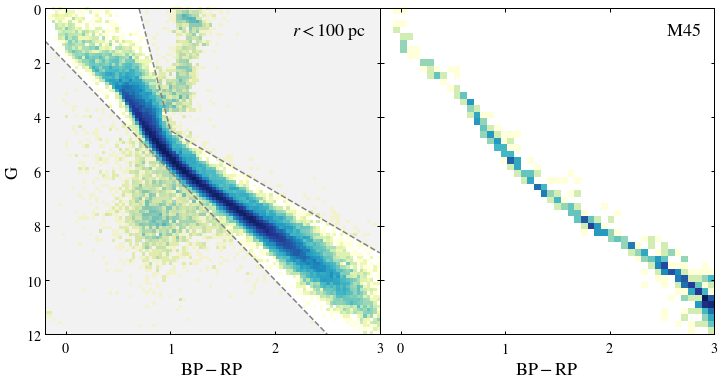

In [5]:
# plot parameters
x_min, x_max = -0.2, 3
y_min, y_max = 0, 12
bins = 100
bins_m45 = 50

# plot
# fig, ax = plt.subplots(figsize=(6,6))
fig, [ax1,ax2] = plt.subplots(1, 2, figsize=(12,6), sharey=True, sharex=True)
fig.subplots_adjust(wspace=0)

ax1.hist2d(gaiarv_cat['bp_rp'][ind_nb_pre], gaiarv_cat['absmag'][ind_nb_pre], range=[[x_min, x_max], [y_min, y_max]],
          bins = bins, norm=mcolors.LogNorm(), cmap=my_YlGnBu)

ax1.plot([-0.2,2.5], [1.2,12], c='gray', ls='--') # y < 4x + 2
ax1.plot([0.7,1,3], [0,4.5,9], c='gray', ls='--') # y > 15x - 10.5 (x<1) 2.25x + 2.25 (x>1)
ax1.fill_between([-0.2,2.5], [1.2,12], [12,12], facecolor='gray', alpha=0.1)
ax1.fill_between([0.7,1,3], [0,4.5,9], [0,0,0], facecolor='gray', alpha=0.1)

ax1.set_xlabel(r'$\mathrm{BP-RP}$')
ax1.set_ylabel(r'$\mathrm{G}$')
ax1.set_xlim(x_min, x_max)
ax1.set_ylim(y_max, y_min)
ax1.set_xticks([0, 1, 2, 3])
ax1.set_xticklabels([r'$0$', r'$1$', r'$2$', r'$3$'])
ax1.set_yticks([0, 2, 4, 6, 8, 10, 12])
ax1.set_yticklabels([r'$0$', r'$2$', r'$4$', r'$6$', r'$8$', r'$10$', r'$12$'])
ax1.text(0.96, 0.96, r'$r<%d\ \mathrm{pc}$' % size_max.value, ha='right', va='top', transform=ax1.transAxes, fontsize=18)

ax2.hist2d(gaiarv_cat_m45['bp_rp'][ind_m45], gaiarv_cat_m45['absmag'][ind_m45], range=[[x_min, x_max], [y_min, y_max]],
          bins = bins_m45, norm=mcolors.LogNorm(), cmap=my_YlGnBu)

ax2.set_xlabel(r'$\mathrm{BP-RP}$')
ax2.set_ylim(y_max, y_min)
ax2.text(0.96, 0.96, r'$\mathrm{M45}$' % size_max.value, ha='right', va='top', transform=ax2.transAxes, fontsize=18)

plt.savefig('./figures/cmd.pdf')
plt.show()

## PDMF

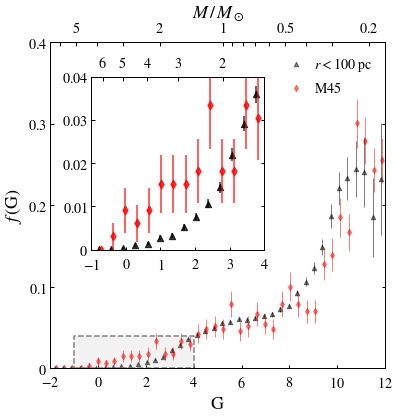

In [50]:
# plot parameters
x_min, x_max = -2, 12
y_min, y_max = 0, 0.4
bins = 40
bin_edges = np.linspace(x_min, x_max, bins+1)

# detection limit
xs = (bin_edges[1:] + bin_edges[:-1])/2
d_lim = np.clip(10**(0.2*(13 - xs) + 1), 0, 100)
correct = (100 / d_lim)**3 # correction factor

# main plot
fig, ax = plt.subplots(figsize=(6,6))

hist_nb, bin_edges = np.histogram(gaiarv_cat['absmag'][ind_nb], bins=bin_edges)
hist_m45, bin_edges = np.histogram(gaiarv_cat_m45['absmag'][ind_m45], bins=bin_edges)

err_nb = np.sqrt(hist_nb) * correct
err_nb = err_nb * bins / (x_max-x_min) / np.sum(hist_nb)
hist_nb = hist_nb * correct
hist_nb = hist_nb * bins / (x_max-x_min) / np.sum(hist_nb)
err_m45 = np.sqrt(hist_m45)
err_m45 = err_m45 * bins / (x_max-x_min) / np.sum(hist_m45)
hist_m45 = hist_m45 * bins / (x_max-x_min) / np.sum(hist_m45)

ax.errorbar(xs, hist_nb, err_nb, fmt='none', alpha=0.5, c='k', elinewidth=1, label=None)
ax.errorbar(xs+0.05, hist_m45, err_m45, fmt='none', alpha=0.5, c='r', elinewidth=1, label=None)
ax.scatter(xs, hist_nb, marker='^', edgecolors='k', facecolor='k', alpha=0.5, s=20, label=r'$r<100\ \mathrm{pc}$')
ax.scatter(xs+0.05, hist_m45, marker='d', edgecolors='r', facecolor='r', alpha=0.5, s=20, label=r'$\mathrm{M45}$')

ax.plot([-1,4,4,-1,-1], [0,0,0.04,0.04,0], c='gray', ls='--')
ax.fill_between([-1,4], [0,0], [0.04,0.04], facecolor='gray', alpha=0.1)

ax.set_xlabel(r'$\mathrm{G}$')
ax.set_ylabel(r'$f\,(\mathrm{G})$')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks([-2, 0, 2, 4, 6, 8, 10, 12])
ax.set_xticklabels([r'$-2$', r'$0$', r'$2$', r'$4$', r'$6$', r'$8$', r'$10$', r'$12$'])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4])
ax.set_yticklabels([r'$0$', r'$0.1$', r'$0.2$', r'$0.3$', r'$0.4$'])
ax.legend(loc=1)

# top ticks
secax = ax.twiny()
secax.set_xlabel(r'$M\,/\,M_\odot$')
secax.set_xlim(x_min, x_max)
secax.set_xticks(-np.array([np.log10(6), np.log10(5), np.log10(4), np.log10(3), np.log10(2), np.log10(1), 
                            np.log10(0.9), np.log10(0.8), np.log10(0.7), np.log10(0.6), np.log10(0.5), np.log10(0.4), 
                            np.log10(0.3), np.log10(0.2)])*8.75+5.2) # G_sun = 5.2
secax.set_xticklabels(['', r'$5$', '', '', r'$2$', r'$1$', '', '', '', '', r'$0.5$', '', '', r'$0.2$'])

# small plot
ax2 = fig.add_axes([0.22,0.40,0.4,0.4])

ax2.errorbar(xs, hist_nb, err_nb, fmt='none', alpha=0.8, c='k', label=None)
ax2.errorbar(xs+0.05, hist_m45, err_m45, fmt='none', alpha=0.8, c='r', label=None)
ax2.scatter(xs, hist_nb, marker='^', edgecolors='k', facecolor='k', alpha=0.8, s=40, label=r'$r<100\ \mathrm{pc}$')
ax2.scatter(xs+0.05, hist_m45, marker='d', edgecolors='r', facecolor='r', alpha=0.8, s=40, label=r'$\mathrm{M45}$')
ax2.set_xlim(-1, 4)
ax2.set_ylim(0, 0.04)
ax2.set_xticks([-1, 0, 1, 2, 3, 4])
ax2.set_xticklabels([r'$-1$', r'$0$', r'$1$', r'$2$', r'$3$', r'$4$'])
ax2.set_yticks([0, 0.01, 0.02, 0.03, 0.04])
ax2.set_yticklabels([r'$0$', r'$0.01$', r'$0.02$', r'$0.03$', r'$0.04$'])

# top ticks
secax2 = ax2.twiny()
secax2.set_xlim(-2, 4)
secax2.set_xticks(-np.array([np.log10(6), np.log10(5), np.log10(4), np.log10(3), np.log10(2)])*8.75+5.2) # G_sun = 5.2
secax2.set_xticklabels([r'$6$', r'$5$', r'$4$', r'$3$', r'$2$'])

plt.savefig('./figures/pdmf.pdf')
plt.show()

### Get MF from luminosity functions

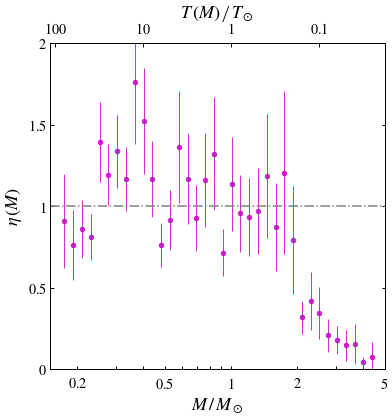

In [130]:
# plot parameters
x_min, x_max = np.log10(0.15), np.log10(5)
y_min, y_max = 0, 2

# main plot
fig, ax = plt.subplots(figsize=(6,6))

# get MF from luminosity functions

m_nb = 10**(-(xs[4:]-5.2)/8.75) # corresponding mass
m_edges_nb = 10**(-(10**(-(bin_edges[4:]-5.2)/8.75)-5.2)/8.75) # corresponding mass lags

fm_nb = hist_nb[4:] * 8.75 * 10**((xs[4:]-5.2)/8.75)/np.log(10) # pdmf
fm_err_nb = err_nb[4:] * 8.75 * 10**((xs[4:]-5.2)/8.75)/np.log(10)
fm_m45 = hist_m45[4:] * 8.75 * 10**((xs[4:]-5.2)/8.75)/np.log(10) # imf
fm_err_m45 = err_m45[4:] * 8.75 * 10**((xs[4:]-5.2)/8.75)/np.log(10)

eta = fm_nb / fm_m45
eta_err = eta * np.sqrt((fm_err_nb/fm_nb)**2 + (fm_err_m45/fm_m45)**2)

ax.errorbar(np.log10(m_nb), eta, eta_err, fmt='none', alpha=0.8, c='m', elinewidth=1, label=None)
ax.scatter(np.log10(m_nb), eta, marker='o', edgecolors='m', facecolor='m', alpha=0.8, s=20, label=r'$r<100\ \mathrm{pc}$')
ax.axhline(1, ls='-.', c='gray')

ax.set_xlabel(r'$M\,/\,M_\odot$')
ax.set_ylabel(r'$\eta\,(M)$')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(np.array([np.log10(5), np.log10(4), np.log10(3), np.log10(2), np.log10(1), 
                        np.log10(0.9), np.log10(0.8), np.log10(0.7), np.log10(0.6), np.log10(0.5), np.log10(0.4), 
                        np.log10(0.3), np.log10(0.2)])) # G_sun = 5.2
ax.set_xticklabels([r'$5$', '', '', r'$2$', r'$1$', '', '', '', '', r'$0.5$', '', '', r'$0.2$'])
ax.set_yticks([0, 0.5, 1, 1.5, 2])
ax.set_yticklabels([r'$0$', r'$0.5$', r'$1$', r'$1.5$', r'$2$'])

# top ticks
secax = ax.twiny()
secax.set_xlabel(r'$\left.T\,(M)\,\right/\,T_\odot$')
secax.set_xlim(x_min, x_max)
secax.set_xticks(-(np.array([-1, 0,1,2]))/2.5) # G_sun = 5.2
secax.set_xticklabels([r'$0.1$', r'$1$', r'$10$', r'$100$'])

plt.show()

### Get SFH from LFs

In [183]:
newx = (m_nb[1:] + m_nb[:-1])/2

psi_list = np.zeros([10000,len(newx)])
for i in range(10000):
    test_eta = np.random.normal(eta, eta_err)

    d_eta = (test_eta[1:] - test_eta[:-1]) / (m_nb[1:] - m_nb[:-1])
    psi_list[i] = -d_eta * newx**3.5

psi = np.mean(psi_list, axis=0)
psi_err = np.std(psi_list, axis=0)


red star mass: 2.010562 M_sun ; time: 1.744642 Gyr


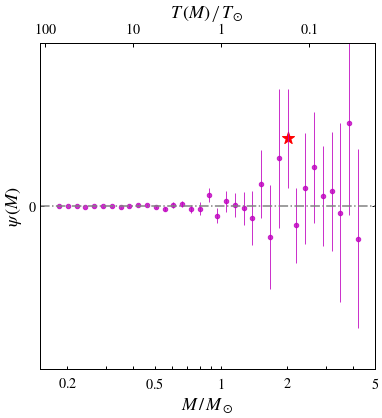

In [208]:
# plot parameters
x_min, x_max = np.log10(0.15), np.log10(5)
y_min, y_max = -70, 70

# main plot
fig, ax = plt.subplots(figsize=(6,6))

ax.errorbar(np.log10(newx), psi, psi_err, fmt='none', alpha=0.8, c='m', elinewidth=1, label=None)
ax.scatter(np.log10(newx), psi, marker='o', edgecolors='m', facecolor='m', alpha=0.8, s=20, label=r'$r<100\ \mathrm{pc}$')
ax.axhline(0, ls='-.', c='gray')
ax.scatter(np.log10(newx[8]), psi[8], marker='*', c='r', s=160)

print('red star mass: %f M_sun' % newx[8], '; time: %f Gyr' % (10*(newx[8])**(-2.5)))

ax.set_xlabel(r'$M\,/\,M_\odot$')
ax.set_ylabel(r'$\psi\,(M)$')
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_xticks(np.array([np.log10(5), np.log10(4), np.log10(3), np.log10(2), np.log10(1), 
                        np.log10(0.9), np.log10(0.8), np.log10(0.7), np.log10(0.6), np.log10(0.5), np.log10(0.4), 
                        np.log10(0.3), np.log10(0.2)])) # G_sun = 5.2
ax.set_xticklabels([r'$5$', '', '', r'$2$', r'$1$', '', '', '', '', r'$0.5$', '', '', r'$0.2$'])
ax.set_yticks([0])
ax.set_yticklabels([r'$0$'])

# top ticks
secax = ax.twiny()
secax.set_xlabel(r'$\left.T\,(M)\,\right/\,T_\odot$')
secax.set_xlim(x_min, x_max)
secax.set_xticks(-np.array([-1, 0,1,2])/2.5) # G_sun = 5.2
secax.set_xticklabels([r'$0.1$', r'$1$', r'$10$', r'$100$'])

plt.savefig('./figures/sfh.pdf')
plt.show()